# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [351]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn')
sns.set_style('whitegrid')

In [352]:
act = pd.read_csv('../data/act.csv')
sat = pd.read_csv('../data/sat.csv')

##### 2. Print the first ten rows of each dataframe.

In [353]:
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [354]:
sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

######  Act Columns:
- Unnamed 0:Entry numbering (0-51). Contains a total of 52 entries or rows
- State: All of the 51 states in the U.S. plus national average
- Participation: This is the rate  at which students in each state take the ACT (number of actual test takers compared to the total possible student) in percentages.
- English: average score in English in each state        
- Math: Average score in Math in each state        
- Reading: Average score in Reading in each state          
- Science: Average score in Science in each state          
- Composite: Average score of all four tests in each state   

###### SAT Columns:
- Unnamed 0:Entry numbering (0-50). Contains a total of 51 entries or rows
- State: All of the 51 states in the U.S. 
- Participation:This is the rate  at which students in each state take the SAT (number of actual test takers compared to the total possible student) in percentages.
- Evidence-Based Reading and Writing:Total score of both reading and writing test
- Math: Total score of math test
- Total: Total score of both tests

##### 4. Does the data look complete? Are there any obvious issues with the observations?

Yes, they look complete

##### 5. Print the types of each column.

In [355]:
#act.info()

In [356]:
#sat.info()

In [357]:
act.dtypes

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [358]:
sat.dtypes

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [359]:
sat.Participation = sat.Participation.str.replace('%', "")
sat.Participation = sat.Participation.astype(float)

In [360]:
act.Participation = act.Participation.str.replace('%', "")
act.Participation = act.Participation.astype(float)

In [361]:
act.head(2)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [362]:
sat_eng_dict = dict(zip(sat['State'], sat['Evidence-Based Reading and Writing']))

In [363]:
sat_math_dict = dict(zip(sat['State'],sat['Math']))

In [364]:
sat_part_dict = dict(zip(sat['State'], sat['Participation']))

In [365]:
act_par_dict = dict(zip(act.State,act.Participation))

In [366]:
act_eng_dict = dict(zip(act.State, act.English))

In [367]:
act_read_dict = dict(zip(act.State, act.Reading))

In [368]:
act_sci_dict = dict(zip(act.State, act.Science))

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [369]:
act.head()

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [370]:
sat_dict = sat.set_index('State').to_dict('list')

In [371]:
act_dict = act.set_index('State').to_dict('list')

##### 9. Merge the dataframes on the state column.

In [372]:
df=pd.concat([sat.set_index('State').add_prefix('SAT_'), act.set_index('State').add_prefix('ACT_')], axis=1)

In [373]:
df = df.drop('National').drop(['SAT_Unnamed: 0', 'ACT_Unnamed: 0'], axis=1)

In [374]:
df.head(2)

,SAT_Participation,SAT_Evidence-Based Reading and Writing,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2
Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [375]:
column_map={
    'SAT_Evidence-Based Reading and Writing':'SAT_English' 
}
df = df.rename(columns=column_map)

In [427]:
df.head()

,SAT_Participation,SAT_English,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2
Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8
Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7
Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4
California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [377]:
df.min()
#df['SAT_Participation'].max()

SAT_Participation      2.0
SAT_English          482.0
SAT_Math              52.0
SAT_Total            950.0
ACT_Participation      8.0
ACT_English           16.3
ACT_Math              18.0
ACT_Reading           18.1
ACT_Science            2.3
ACT_Composite         17.8
dtype: float64

In [378]:
df.max()

SAT_Participation     100.0
SAT_English           644.0
SAT_Math              651.0
SAT_Total            1295.0
ACT_Participation     100.0
ACT_English            25.5
ACT_Math               25.3
ACT_Reading            26.0
ACT_Science            24.9
ACT_Composite          25.5
dtype: float64

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [379]:
df.columns

Index(['SAT_Participation', 'SAT_English', 'SAT_Math', 'SAT_Total',
       'ACT_Participation', 'ACT_English', 'ACT_Math', 'ACT_Reading',
       'ACT_Science', 'ACT_Composite'],
      dtype='object')

In [380]:
mu_SAT_Participation = np.mean(df.SAT_Participation)
mu_SAT_English = np.mean(df.SAT_English)
mu_SAT_Math = np.mean(df.SAT_Math)
mu_SAT_Total = np.mean(df.SAT_Total)
mu_ACT_Participation = np.mean(df.ACT_Participation)
mu_ACT_English = np.mean(df.ACT_English)
mu_ACT_Math = np.mean(df.ACT_Math)
mu_ACT_Reading = np.mean(df.ACT_Reading)
mu_ACT_Science = np.mean(df.ACT_Science)
mu_ACT_Composite = np.mean(df.ACT_Composite)


In [381]:
np.sqrt(sum([(each-mu_SAT_Participation)**2 for each in df.SAT_Participation])/len(df.SAT_Participation))

34.92907076664508

In [382]:
sd = [np.sqrt(sum([(each-mu_SAT_Participation)**2 for each in df.SAT_Participation])/len(df.SAT_Participation)),
     np.sqrt(sum([(each-mu_SAT_English)**2 for each in df.SAT_English])/len(df.SAT_English)),
     np.sqrt(sum([(each-mu_SAT_Math)**2 for each in df.SAT_Math])/len(df.SAT_Math)),
     np.sqrt(sum([(each-mu_SAT_Total)**2 for each in df.SAT_Total])/len(df.SAT_Total)),
     np.sqrt(sum([(each-mu_ACT_Participation)**2 for each in df.ACT_Participation])/len(df.ACT_Participation)),
     np.sqrt(sum([(each-mu_ACT_English)**2 for each in df.ACT_English])/len(df.ACT_English)),
     np.sqrt(sum([(each-mu_ACT_Math)**2 for each in df.ACT_Math])/len(df.ACT_Math)),
     np.sqrt(sum([(each-mu_ACT_Reading)**2 for each in df.ACT_Reading])/len(df.ACT_Reading)),
     np.sqrt(sum([(each-mu_ACT_Science)**2 for each in df.ACT_Science])/len(df.ACT_Science)),
     np.sqrt(sum([(each-mu_ACT_Composite)**2 for each in df.ACT_Composite])/len(df.ACT_Composite))
     ]

In [383]:
sd

[34.92907076664508,
 45.21697020437866,
 84.07255521608297,
 91.58351056778743,
 31.824175751231806,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 3.151107895464408,
 2.000786081581989]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

***PS:do not have to do***

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [384]:
sorted_Part = df['SAT_Participation'].sort_values()

##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [385]:
SAT_Part_Over_50 = df.SAT_Participation[df['SAT_Participation']>50]

In [386]:
len(SAT_Part_Over_50)

22

In [387]:
ACT_Part_Over_50 = df.ACT_Participation[df['ACT_Participation']>50]

In [388]:
len(ACT_Part_Over_50)

31

There are 9 more states that have a participation rate over 50% in ACT than SAT

In [416]:
ACT_Part_100 = df.ACT_Participation[df['ACT_Participation']== 100]

In [418]:
len(ACT_Part_100)

17

In [419]:
SAT_Part_100 = df.SAT_Participation[df['SAT_Participation']== 100]

In [420]:
len(SAT_Part_100)

4

## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

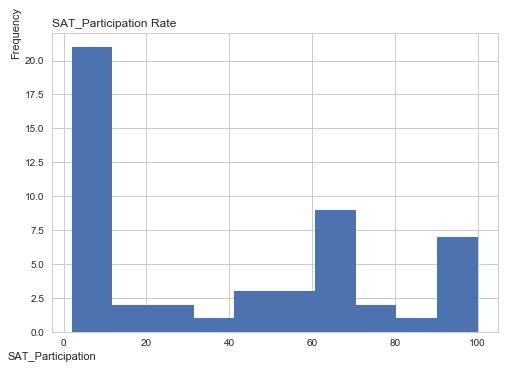

In [421]:
plt.hist(df.SAT_Participation)
plt.xlabel("SAT_Participation", position = (0,0)) # (x,y)
plt.ylabel("Frequency", position = (0,1))
plt.title("SAT_Participation Rate", position = (0,1), ha = 'left');

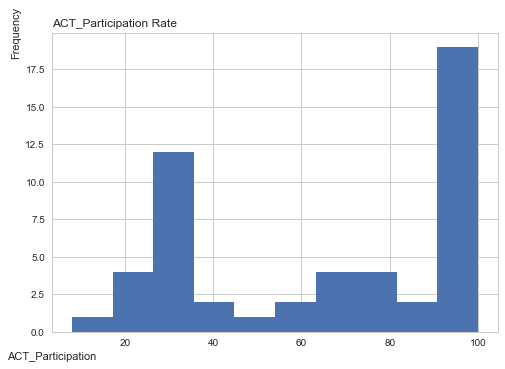

In [390]:
plt.hist(df.ACT_Participation)
plt.xlabel("ACT_Participation", position = (0,0)) # (x,y)
plt.ylabel("Frequency", position = (0,1))
plt.title("ACT_Participation Rate", position = (0,1), ha = 'left');

##### 17. Plot the Math(s) distributions from both data sets.

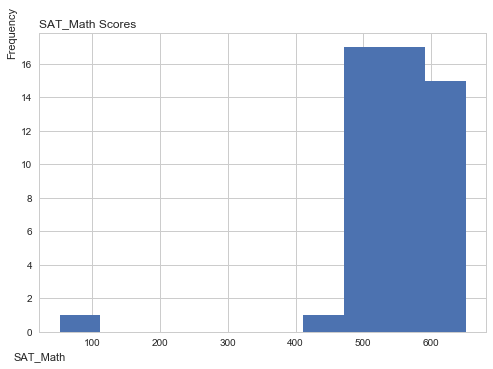

In [391]:
plt.hist(df.SAT_Math)
plt.xlabel("SAT_Math", position = (0,0)) # (x,y)
plt.ylabel("Frequency", position = (0,1))
plt.title("SAT_Math Scores", position = (0,1), ha = 'left');

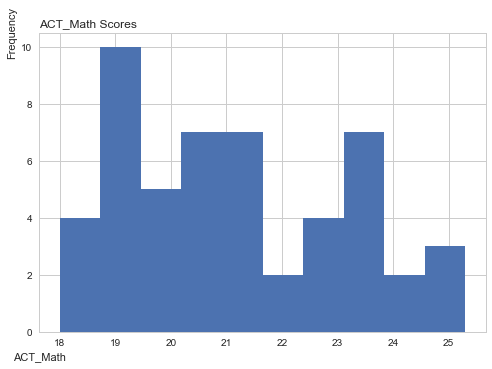

In [392]:
plt.hist(df.ACT_Math)
plt.xlabel("ACT_Math", position = (0,0)) # (x,y)
plt.ylabel("Frequency", position = (0,1))
plt.title("ACT_Math Scores", position = (0,1), ha = 'left');

##### 18. Plot the Verbal distributions from both data sets.

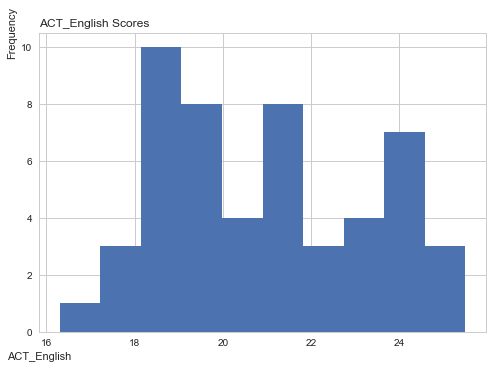

In [393]:
plt.hist(df.ACT_English)
plt.xlabel("ACT_English", position = (0,0)) # (x,y)
plt.ylabel("Frequency", position = (0,1))
plt.title("ACT_English Scores", position = (0,1), ha = 'left');

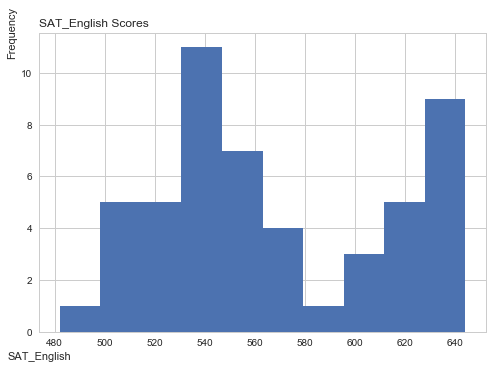

In [394]:
plt.hist(df.SAT_English)
plt.xlabel("SAT_English", position = (0,0)) # (x,y)
plt.ylabel("Frequency", position = (0,1))
plt.title("SAT_English Scores", position = (0,1), ha = 'left');

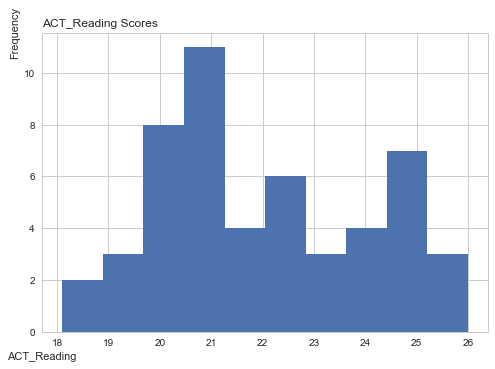

In [395]:
plt.hist(df.ACT_Reading)
plt.xlabel("ACT_Reading", position = (0,0)) # (x,y)
plt.ylabel("Frequency", position = (0,1))
plt.title("ACT_Reading Scores", position = (0,1), ha = 'left');

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

That they are distributed normaly

##### 20. Does this assumption hold true for any of our columns? Which?

No, it does not hold true for any of the columns based on the above plotted data

##### 21. Plot some scatterplots examining relationships between all variables.

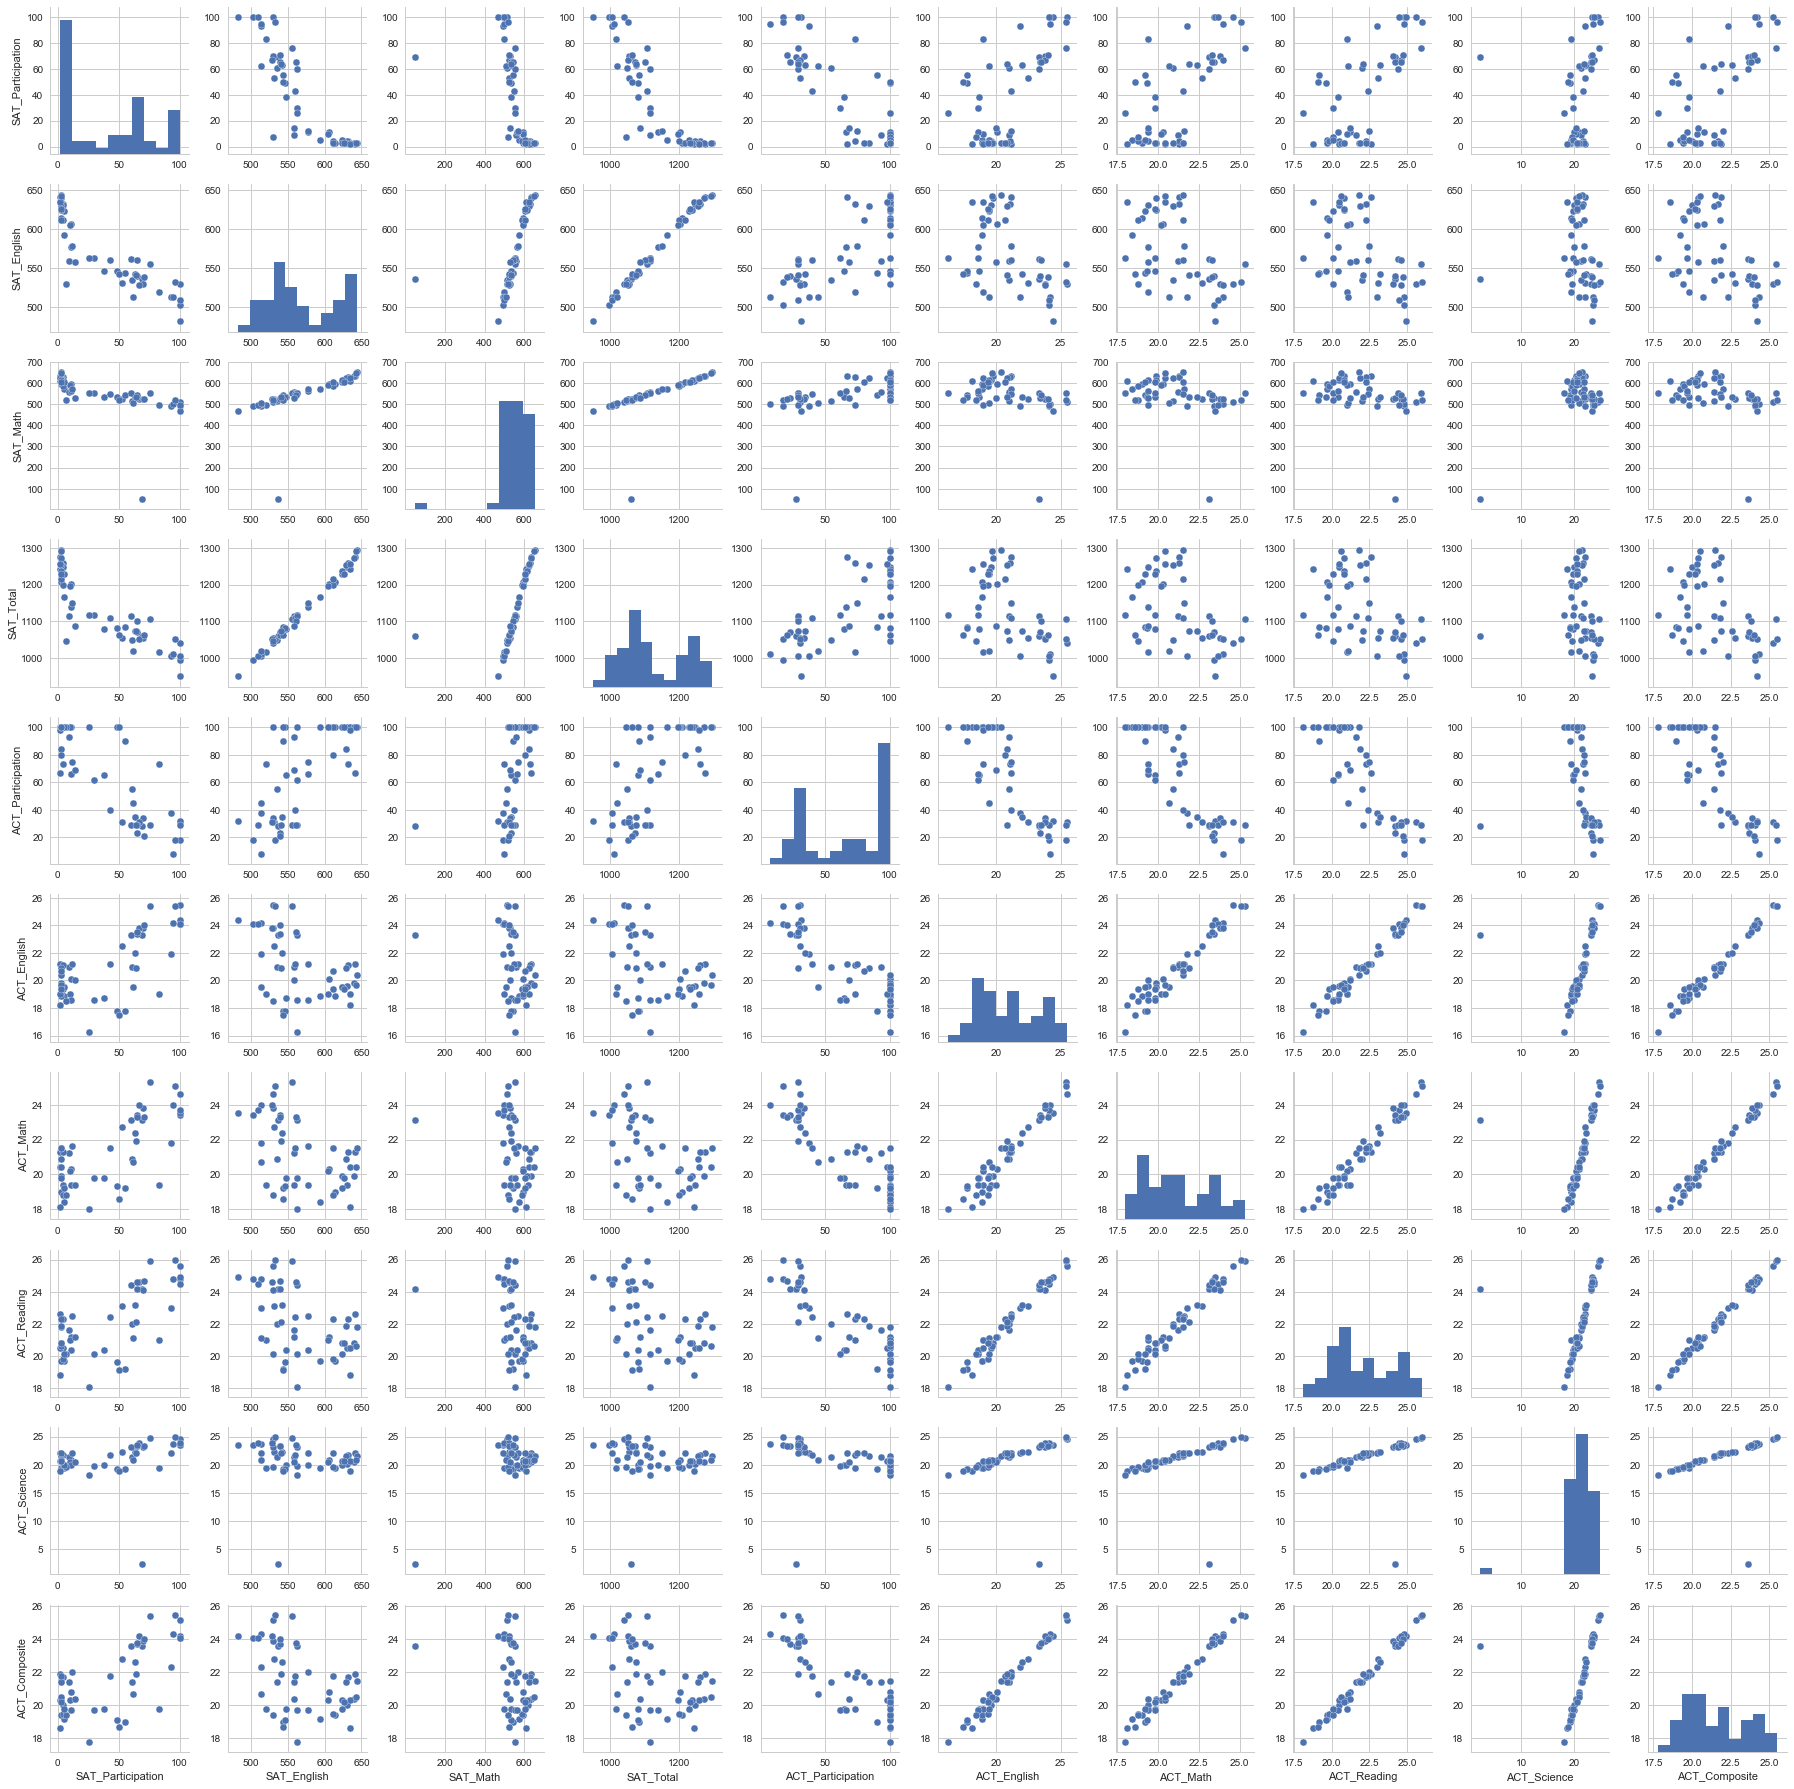

In [396]:
sns.pairplot(df)

##### 22. Are there any interesting relationships to note?

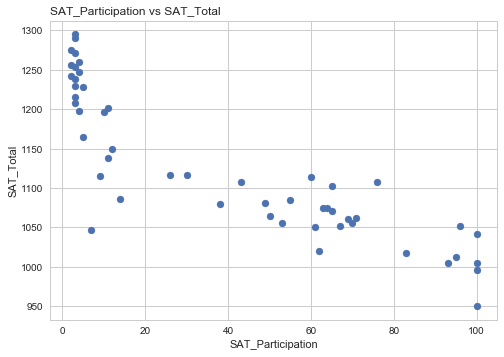

In [425]:
x= df.SAT_Participation
y= df.SAT_Total
plt.scatter(x,y)
plt.xlabel("SAT_Participation") # (x,y)
plt.ylabel("SAT_Total")
plt.title("SAT_Participation vs SAT_Total", position = (0,1), ha = 'left');
plt.savefig('P_SAT_PartVSTotal.png')

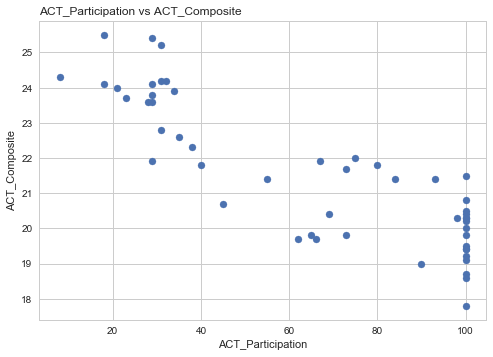

In [424]:
x= df.ACT_Participation
y= df.ACT_Composite
plt.scatter(x,y)
plt.xlabel("ACT_Participation") # (x,y)
plt.ylabel("ACT_Composite")
plt.title("ACT_Participation vs ACT_Composite", position = (0,1), ha = 'left');
plt.savefig('P_ACT_PartVSTotal.png')

##### 23. Create box plots for each variable. 

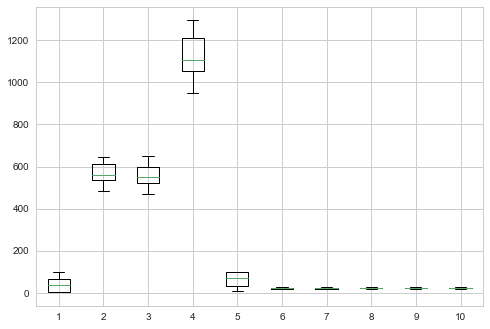

In [399]:
plt.boxplot(df.T);

In [400]:
df.columns

Index(['SAT_Participation', 'SAT_English', 'SAT_Math', 'SAT_Total',
       'ACT_Participation', 'ACT_English', 'ACT_Math', 'ACT_Reading',
       'ACT_Science', 'ACT_Composite'],
      dtype='object')

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [401]:
#The three things we care about are shape, spread(IQR = 75%-25%), center=50%(Median)
df.describe()

,SAT_Participation,SAT_English,SAT_Math,SAT_Total,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608
std,35.276632,45.666901,84.909119,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695
min,2.000000,482.000000,52.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,4.000000,533.500000,522.000000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


**SAT_Participation**
    Shape is not normal;
    IQR is 0.62;
    Center is 0.38

**SAT_English**
Shape is not normal;
IQR is79.5;
Center is 559

**SAT_Math**
Shape is not normal;
IQR is 77;
Center is 548

**SAT_Total**
Shape is not normal;
IQR is 156.5;
Center is 1107

**ACT_Participation**
Shape is not normal;
IQR is 69;
Center is .69

**ACT_English**
Shape is not normal;
IQR is 4.3;
Center is 20.7

**ACT_Math**
Shape is not normal;
IQR is 3.7;
Center is 20.9

**ACT_Reading**
Shape is not normal;
IQR is 3.7;
Center is 21.8

**ACT_Science**
Shape is not normal;
IQR is 2.85;
Center is 21.3

**ACT_Composite**
Shape is not normal;
IQR is 3.8;
Center is 21.4

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

ACT participation acts reversely to SAT participation. 
Hence, states where there is a high participation in one test, the is a low participation in the other test

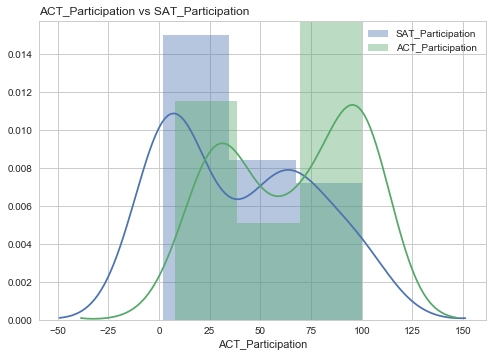

In [426]:
sns.distplot(df['SAT_Participation'],label='SAT_Participation')
sns.distplot(df['ACT_Participation'], label='ACT_Participation')
plt.title("ACT_Participation vs SAT_Participation", position = (0,1), ha = 'left');
plt.legend()
plt.savefig('P_ACT_VS_PSAT.png')

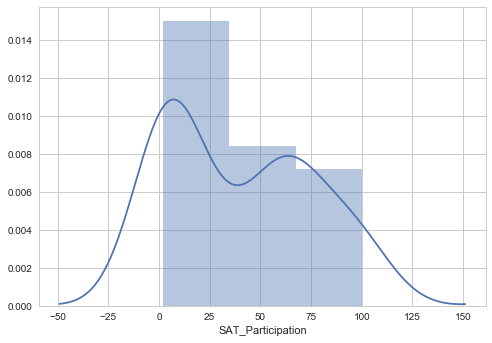

In [403]:
sns.distplot(df['SAT_Participation'])

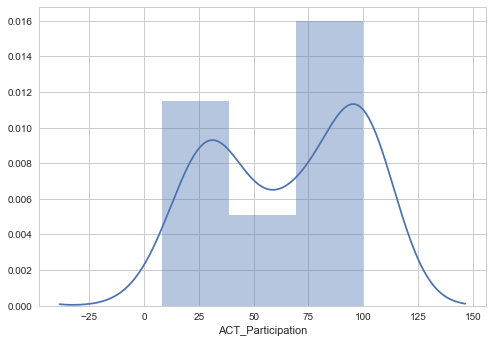

In [404]:
sns.distplot(df['ACT_Participation'])

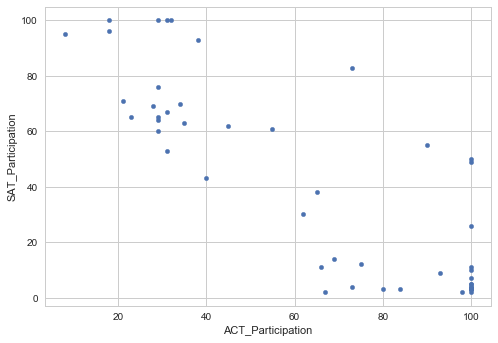

In [405]:
df.plot(x= 'ACT_Participation', y= 'SAT_Participation',kind = "scatter")

As SAT participation decreases, so as ACT participation increased

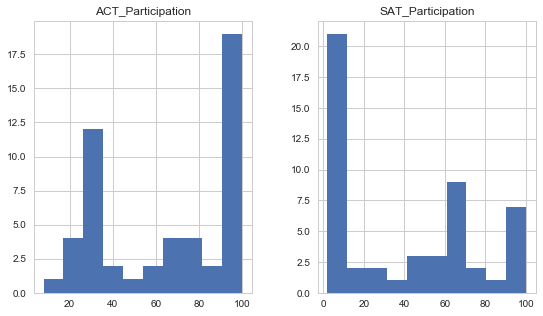

In [407]:
df[['SAT_Participation', 'ACT_Participation']].hist(figsize=(9,5));

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [408]:
stats.ttest_ind(df['ACT_Participation'], df['SAT_Participation'])

Ttest_indResult(statistic=3.8085778908170544, pvalue=0.00024134203698662353)

In [409]:
t_stat, p_value =stats.ttest_ind(df['ACT_Participation'], df['SAT_Participation'])
t_stat, p_value

(3.8085778908170544, 0.00024134203698662353)

Based on the pvalue being much less than the threshold, it shows that they have identical means as we can see in the plot below. There is evidence to reject the null hypothesis of identical average scores. 

In [410]:
xpoints =np.linspace(-4, 4, 500)
ypoints = stats.t.pdf(xpoints, len(df['ACT_Participation'])+
                      len(df['SAT_Participation'])-2, 0,1)

In [412]:
fig = plt.figure(figsize = (0,5))
ax = fig.gca()
ax.plot(xpoints, ypoints, linewidth =3, color='darkred')
ax.axvline(t_stat, color = 'black', linestyle = '--', lw=5)

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [304]:
n=df.shape[0]
act_participation_mean = df['ACT_Participation'].mean()
act_participation_std_error = np.std(df['ACT_Participation'],
                                     ddof=1)/np.sqrt(n)

In [305]:
stats.norm.interval(0.95, act_participation_mean, 
                    act_participation_std_error)

(56.43385258470262, 74.075951336866)

In [413]:
act_participation_mean

65.25490196078431

In [226]:
n=df.shape[0]
sat_participation_mean = df['SAT_Participation'].mean()
sat_participation_std_error = np.std(df['SAT_Participation'],
                                    ddof=1)/np.sqrt(n)

In [308]:
stats.norm.interval(0.95, sat_participation_mean, 
                    sat_participation_std_error)

(30.122255017332662, 49.48558811992224)

In [414]:
sat_participation_mean

39.80392156862745

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, since the p_value was lower than the threshhold, there was a statistically significantly diffenence to reject the null hypothesis which shows that there is a difference in the mean. which is what we see at 95% confidence interval, there is a difference in the mean values.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

I would say that it is not appropriate to generate correlation between both tests since they have very different mean values.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

Yes, but only to any extent because there is a story in history and conducting statistics on one year does not show any history, however, it does tells the relationship that exist between the participation rates in correlation to the test scores for 2017.